http://mikekosk.com/numerai-competition-attempt-1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
# Load Training Data
training_data =  pd.read_csv('numerai_training_data.csv').drop(['id', 'data_type'], axis=1)
prediction_data = pd.read_csv('numerai_tournament_data.csv', header=0)

# Transform the loaded CSV data into numpy arrays
features = [f for f in list(training_data) if "feature" in f]
X = training_data[features]
Y = training_data[[column for column in training_data.columns if 'target' in column]]
x_prediction = prediction_data[features]
ids = prediction_data["id"]

In [3]:
print (X.shape, Y.shape)

(502732, 50) (502732, 5)


In [4]:
# print (X.describe() )

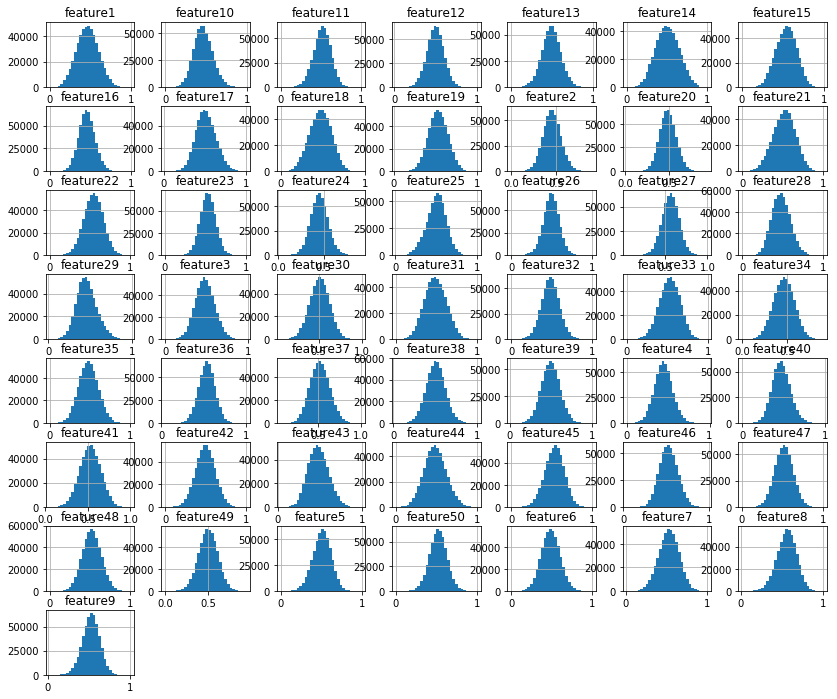

In [5]:
X.hist(figsize=(14, 12), bins=30);

In [8]:
params = {}
params['eta'] = 0.2 # control the learning rate: scale the contribution of each tree by a factor of 0 < eta < 1. Lower is slower but more robust to overfitting.
params['objective'] = 'binary:logistic' # Default.  Running a regression, since we're predicting values not classes
params['eval_metric'] = 'logloss' # We're evaluating our models on Mean Average Error.  
params['max_depth'] = 5 # Maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting.
params['silent'] = 1 # Don't print messages

for target in Y.columns.values:
    Y_target=Y[target]
    x_train, x_valid, y_train, y_valid = train_test_split(X, Y_target, test_size=0.1, random_state=False)
    
    d_train = xgb.DMatrix(x_train, label=y_train)
    d_valid = xgb.DMatrix(x_valid, label=y_valid)
    print (target)

    # We will be tuning our model based on how it does in the validation dataset 
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Early stopping
    clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=20, verbose_eval=10)

target_bernie
[0]	train-logloss:0.692755	valid-logloss:0.692943
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.690682	valid-logloss:0.692605
[20]	train-logloss:0.689491	valid-logloss:0.692755
Stopping. Best iteration:
[9]	train-logloss:0.690841	valid-logloss:0.692591

target_charles
[0]	train-logloss:0.692821	valid-logloss:0.693014
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.690894	valid-logloss:0.692593
[20]	train-logloss:0.689697	valid-logloss:0.692593
[30]	train-logloss:0.688731	valid-logloss:0.692574
[40]	train-logloss:0.687687	valid-logloss:0.692776
Stopping. Best iteration:
[23]	train-logloss:0.689338	valid-logloss:0.692562

target_elizabeth
[0]	train-logloss:0.692768	valid-logloss:0.692966
Multiple eval metrics have been passed: '